# Data visualization

In [1]:
import os
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')
gdrive_path = "/content/drive/MyDrive/Tidy_Python_2025/"
%cd $gdrive_path

Mounted at /content/drive
/content/drive/MyDrive/Tidy_Python_2025


## Deep look into the data
- Visualize patterns, identify possible errors (logical or numerical)
- Consider adding clearcut cleaning steps into our pipeline in nb2.
- Modularize operations for reuse, chaining, and logging.

In [3]:
# !rm -r 2025-tidy-python
# !git clone https://github.com/Py-ualg/2025-tidy-python.git

In [4]:
data_tidy_path = gdrive_path + 'tidy-data/'

In [5]:
crabs = pd.read_parquet(os.path.join(data_tidy_path, 'crabs.parquet'))

In [6]:
crabs.head()

,region,date,species,sex,stage,is_gravid,carapace_width,carapace_length,front_width,left_claw_length,right_claw_length,depth,associated_species,behaviour
0,Ria Alvor,2020-01-02,Uca olhanensis,female,juvenile,False,0.749001,0.672986,3.454545,0.969131,0.715282,7.0,"['Sea Sponge', 'Shrimp', 'Sea Star']",Collecting biofilm from sunken wood.
1,Ria Alvor,2020-01-02,Afruca farensis,NaN,sub_adult,None,3.176997,3.522727,3.454545,4.634476,3.790048,9.0,"['Snail', 'Sea Sponge', 'Algae', 'Sea Star']",Side-stepping along sandy coastal floor.
2,Ria Alvor,2020-01-02,Uca olhanensis,NaN,sub_adult,None,0.591866,0.568182,3.727273,0.748647,0.618259,11.0,['Snail'],Guarding eggs beneath body flap.
3,Ria Alvor,2020-01-02,Uca olhanensis,male,adult,None,3.426632,3.272727,3.727273,4.336083,3.471059,7.0,"['Sea Urchin', 'Polychaete Worm']",Swiftly dashing across exposed sand.
4,Ria Alvor,2020-01-02,Uca olhanensis,female,adult,False,3.126850,3.315087,3.636364,4.384256,3.536922,3.0,"['Hermit Crab', 'Sea Sponge', 'Jellyfish', 'Ba...",Gradual movement in cold conditions.


In [7]:
crabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23824 entries, 0 to 23823
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   region              23824 non-null  category      
 1   date                23824 non-null  datetime64[ns]
 2   species             23824 non-null  category      
 3   sex                 21801 non-null  category      
 4   stage               23824 non-null  category      
 5   is_gravid           12019 non-null  object        
 6   carapace_width      23824 non-null  float64       
 7   carapace_length     23824 non-null  float64       
 8   front_width         23824 non-null  float64       
 9   left_claw_length    23824 non-null  float64       
 10  right_claw_length   23824 non-null  float64       
 11  depth               23824 non-null  float64       
 12  associated_species  23824 non-null  object        
 13  behaviour           23824 non-null  object    

### Numerical columns

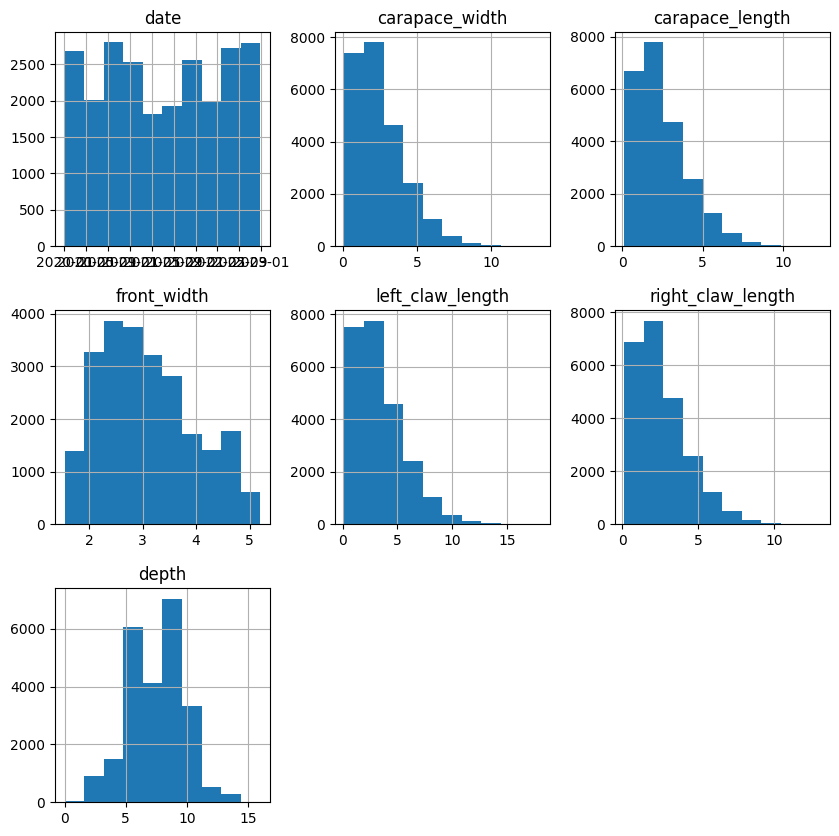

In [8]:
crabs.hist(figsize=(10, 10));

### Remove negative values
- we have done it in nb2, however you can imagine you might have missed it and notice it only here.
- Try not to be lazy, and fix it upstream

In [9]:
#@title Remove negative values
crabs1 = crabs[crabs['right_claw_length'] > 0]
crabs1 = crabs1[crabs1['left_claw_length'] > 0]
crabs1.shape, crabs.shape


((23824, 14), (23824, 14))

In [12]:
#@title Reconcile integer vs Float values

# rename
crabs1.rename(columns={'depth [m]': 'depth'}, inplace=True)

# map columns as integers
crabs1 = crabs1.astype({
    'depth': int,
})

In [13]:
crabs1.describe()

,date,carapace_width,carapace_length,front_width,left_claw_length,right_claw_length,depth
count,23824,23824.000000,23824.000000,23824.000000,23824.000000,23824.000000,23824.000000
mean,2021-07-04 08:48:30.946944256,2.508782,2.479643,3.114744,3.387991,2.604520,7.360813
min,2020-01-02 00:00:00,0.123718,0.131395,1.545455,0.171086,0.132600,0.000000
25%,2020-09-29 00:00:00,1.234451,1.227273,2.400000,1.654192,1.294344,6.000000
50%,2021-07-13 00:00:00,2.142766,2.113636,3.000000,2.881698,2.223192,7.000000
75%,2022-04-08 00:00:00,3.423904,3.375000,3.636364,4.614052,3.537980,9.000000
max,2022-12-28 00:00:00,13.284025,12.300000,5.200000,18.040867,13.058792,16.000000
std,NaN,1.657507,1.623611,0.858202,2.256039,1.708114,2.265140


In [15]:
crabs1.memory_usage(deep=True).sum() / 1e6

np.float64(6.74717)

In [16]:
# prompt: round column values for two significant digits

crabs1 = crabs1.round(2)
crabs1.head()

,region,date,species,sex,stage,is_gravid,carapace_width,carapace_length,front_width,left_claw_length,right_claw_length,depth,associated_species,behaviour
0,Ria Alvor,2020-01-02,Uca olhanensis,female,juvenile,False,0.75,0.67,3.45,0.97,0.72,7,"['Sea Sponge', 'Shrimp', 'Sea Star']",Collecting biofilm from sunken wood.
1,Ria Alvor,2020-01-02,Afruca farensis,NaN,sub_adult,None,3.18,3.52,3.45,4.63,3.79,9,"['Snail', 'Sea Sponge', 'Algae', 'Sea Star']",Side-stepping along sandy coastal floor.
2,Ria Alvor,2020-01-02,Uca olhanensis,NaN,sub_adult,None,0.59,0.57,3.73,0.75,0.62,11,['Snail'],Guarding eggs beneath body flap.
3,Ria Alvor,2020-01-02,Uca olhanensis,male,adult,None,3.43,3.27,3.73,4.34,3.47,7,"['Sea Urchin', 'Polychaete Worm']",Swiftly dashing across exposed sand.
4,Ria Alvor,2020-01-02,Uca olhanensis,female,adult,False,3.13,3.32,3.64,4.38,3.54,3,"['Hermit Crab', 'Sea Sponge', 'Jellyfish', 'Ba...",Gradual movement in cold conditions.


Does not lead to saving memory because numbers are still `float64`, however it is more scientifically sound

In [17]:
crabs1.memory_usage(deep=True).sum() / 1e6

np.float64(6.74717)

#### Extreme values

Is 18 cm for left_claw_length reasonable? What do you do?
- cutoff?, drop rows? Where?
- For normal distribution, outlier can be for instance `mean +- 3STD`. This is not Normal distribution, so apply or not apply?
- Other statistical test
- **Domain knowledge**

In [18]:
#@ Tukey's method
# Compute the interquartile range (IQR): IQR = Q3 - Q1
# Define outliers as values:
#     Below Q1 - 1.5 * IQR
#     Above Q3 + 1.5 * IQR

q1 = crabs1['left_claw_length'].quantile(0.25)
q3 = crabs1['left_claw_length'].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = crabs1[(crabs1['left_claw_length'] < lower) | (crabs1['left_claw_length'] > upper)]

In [19]:
outliers

,region,date,species,sex,stage,is_gravid,carapace_width,carapace_length,front_width,left_claw_length,right_claw_length,depth,associated_species,behaviour
118,Ria Alvor,2020-01-02,Afruca farensis,male,sub_adult,None,8.11,6.82,3.73,11.23,7.28,9,"['Sea Star', 'Small Fish', 'Coral Fragment']",Retreating swiftly from perceived danger.
134,Ria Alvor,2020-01-02,Afruca farensis,male,adult,None,6.68,6.14,3.55,9.94,6.38,3,"['Jellyfish', 'Hermit Crab', 'Coral Fragment']",Approaching small fish with curiosity.
137,Ria Alvor,2020-01-02,Afruca farensis,female,adult,True,6.34,6.28,3.82,9.17,6.74,5,"['Algae', 'Shrimp', 'Sea Sponge', 'Small Fish'...",Lying still to avoid detection.
226,Ria Alvor,2020-01-02,Afruca farensis,female,adult,False,7.47,6.96,3.55,9.44,7.38,4,"['Shrimp', 'Mussel', 'Sea Urchin']",Guarding eggs beneath body flap.
242,Ria Alvor,2020-01-02,Afruca farensis,male,adult,None,7.15,6.68,3.55,9.53,7.00,8,"['Sea Anemone', 'Hermit Crab', 'Snail']",Resting in shaded crevice along cliff.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23749,Ria Formosa,2022-12-28,Uca olhanensis,male,adult,None,7.98,7.35,1.90,11.89,7.60,7,"['Polychaete Worm', 'Sea Anemone', 'Barnacle',...",Foraging through tangled seagrass roots.
23762,Ria Formosa,2022-12-28,Afruca farensis,male,sub_adult,None,7.03,5.88,1.70,10.06,6.38,8,"['Algae', 'Sea Star', 'Mussel']",Harvesting food beneath floating debris.
23783,Ria Formosa,2022-12-28,Uca olhanensis,female,sub_adult,False,7.77,8.05,2.00,9.98,8.67,10,"['Crab (Other Species)', 'Snail', 'Coral Fragm...",Scavenging at the edge of tidal pools.
23796,Ria Formosa,2022-12-28,Uca olhanensis,male,adult,None,7.40,6.75,2.00,10.31,6.76,7,"['Hermit Crab', 'Mussel', 'Barnacle', 'Sea Star']",Traversing algae-slick rock surfaces.


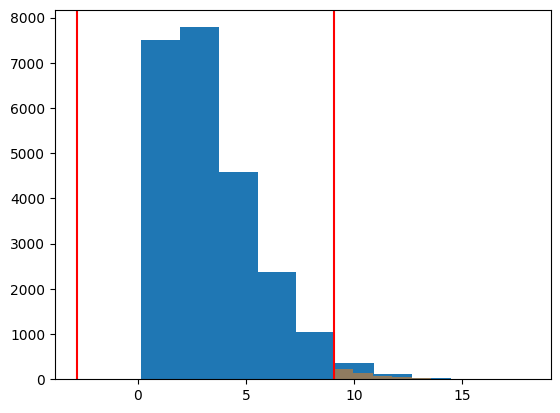

In [20]:
plt.hist(crabs1['left_claw_length'])
plt.axvline(x=lower, color='r')
plt.axvline(x=upper, color='r')
plt.hist(outliers['left_claw_length'], alpha=0.5)
plt.show()

#### Exercise *1*: fix the histogram plot
- set bins + yaxis as *logscale*

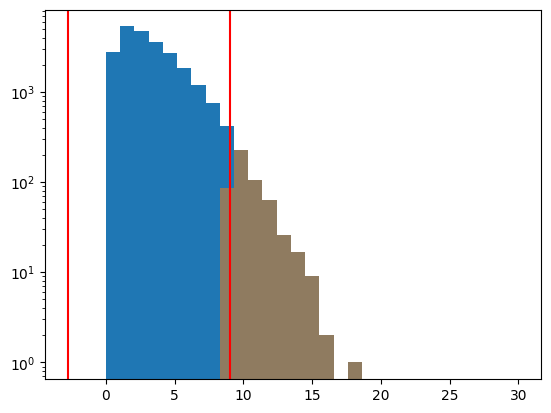

In [21]:
#@title Solution

bins = np.linspace(0, 30, 30)
plt.hist(crabs1['left_claw_length'], bins=bins)
plt.axvline(x=lower, color='r')
plt.axvline(x=upper, color='r')
plt.hist(outliers['left_claw_length'], bins=bins, alpha=0.5)
plt.yscale('log')
plt.show()

#### Exercise 2: make the IQR into a function

In [22]:
#@title Solution
def get_iqr(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Compute the interquartile range (IQR) for a given column in a DataFrame.

    Args:
        df (pandas.DataFrame): The input DataFrame.
        col (str): The name of the column for which to compute the IQR.

    Returns:
        tuple: A tuple containing the lower and upper bounds of the IQR.
    """
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers

In [23]:
def modified_z_score(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Compute the modified z-score for a given column in a DataFrame.

    Args:
        df (pandas.DataFrame): The input DataFrame.
        col (str): The name of the column for which to compute the modified z-score.

    Returns:
        pandas.DataFrame: A new DataFrame with the modified z-score for the specified column.
    """

    x = df[col].dropna()
    median = np.median(x)
    mad = np.median(np.abs(x - median))
    mod_z = 0.6745 * (x - median) / mad

    outliers = df.loc[np.abs(mod_z) > 3.5]
    return outliers

In [24]:
def get_outliers_std(df: pd.DataFrame, col: str, std_cutoff=3) -> pd.DataFrame:
    x = df[col].dropna()
    mean = np.mean(x)
    std = np.std(x)
    outliers = df.loc[np.abs(x - mean) > std_cutoff * std]
    return outliers

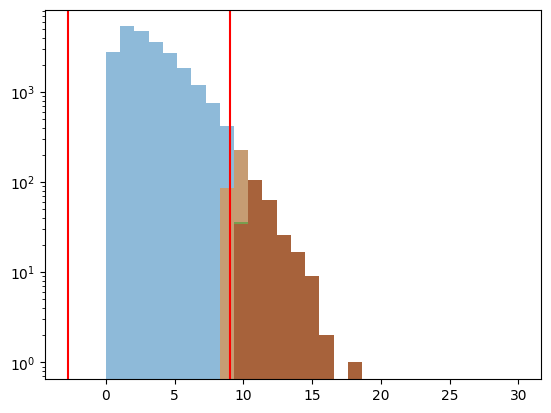

In [25]:
outliers_iqr = get_iqr(crabs1, 'left_claw_length')
outliers_z = modified_z_score(crabs1, 'left_claw_length')
outliers_std = get_outliers_std(crabs1, 'left_claw_length')

bins = np.linspace(0, 30, 30)
plt.hist(crabs1['left_claw_length'], bins=bins, alpha=0.5)
plt.hist(outliers_iqr['left_claw_length'], bins=bins, alpha=0.5)
plt.hist(outliers_z['left_claw_length'], bins=bins, alpha=0.5)
plt.hist(outliers_std['left_claw_length'], bins=bins, alpha=0.5)


plt.axvline(x=lower, color='r')
plt.axvline(x=upper, color='r')
plt.yscale('log')
plt.show()

### Drop or not to drop?
- in any case, perhaps we want to log these events for future reference
- `logging` module

In [35]:
import logging

logging_path = gdrive_path + 'logs/'
!mkdir -p $logging_path
log_file = os.path.join(logging_path, "nb3.log")

logging.root.handlers = []

# set up logging
logging.basicConfig(
    filename=log_file,
    filemode='a',  # Use 'w' to overwrite on each run
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

logging.info("Logging is configured and ready!")

In [37]:
# there is always only now exression in logger, not like a print
# f-strings are not fully backwards compatible, but I personally use them. Purists use it as below
logging.info("Dropping %d outliers and resetting index", len(outliers_std))
crabs2 = crabs1.drop(outliers_std.index).reset_index(drop=True)
logging.info("Resulting DataFrame has %d rows", len(crabs2))

This is a good start, but to avoid sensitivity to variable name changes, it would be better to have this in a functions

### Categorical features

In [28]:
#@title What would not make sense?

crabs2[(crabs2['sex'] == 'male') & (crabs2['is_gravid'] == True)]

,region,date,species,sex,stage,is_gravid,carapace_width,carapace_length,front_width,left_claw_length,right_claw_length,depth,associated_species,behaviour
10,Ria Alvor,2020-01-02,Uca olhanensis,male,pre_puberty,True,0.87,1.16,3.64,1.14,1.24,6,['Small Fish'],Gradual movement in cold conditions.
20,Ria Alvor,2020-01-02,Afruca farensis,male,sub_adult,True,3.23,2.84,3.64,3.98,3.11,5,"['Sea Anemone', 'Crab (Other Species)', 'Snail...",Progressing cautiously through new area.
30,Ria Alvor,2020-01-02,Uca olhanensis,male,juvenile,True,0.53,0.41,3.36,0.68,0.44,6,"['Snail', 'Shrimp', 'Sea Sponge']",Defensive claw movement in water.
50,Ria Alvor,2020-01-02,Afruca farensis,male,adult,True,2.78,2.59,3.45,4.07,2.64,5,['Shrimp'],Slowly navigating around seagrass beds.
60,Ria Alvor,2020-01-02,Uca olhanensis,male,adult,True,2.92,3.00,3.36,4.14,3.02,7,"['Polychaete Worm', 'Crab (Other Species)', 'S...",Entering burrow after disturbance.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23418,Ria Formosa,2022-12-28,Uca olhanensis,male,pre_puberty,True,1.27,1.42,1.90,1.76,1.50,7,"['Snail', 'Polychaete Worm', 'Crab (Other Spec...",Gradual movement in cold conditions.
23428,Ria Formosa,2022-12-28,Uca olhanensis,male,adult,True,6.72,6.30,1.80,9.28,6.78,5,"['Sea Urchin', 'Sea Sponge']",Filtering detritus from shallow bottom.
23513,Ria Formosa,2022-12-28,Uca olhanensis,male,sub_adult,True,2.79,2.88,1.90,3.46,3.16,11,"['Snail', 'Jellyfish', 'Algae', 'Sea Anemone',...",Lying still to avoid detection.
23523,Ria Formosa,2022-12-28,Uca olhanensis,male,sub_adult,True,2.28,2.75,1.80,3.38,3.02,8,"['Shrimp', 'Sea Star', 'Crab (Other Species)',...",Guarding hole in substrate from intruders.


In [29]:
crabs2['is_gravid'].value_counts()

,count
is_gravid,
False,7610
True,4336


1. First, pregnant males make up to 5% of all the samples,
2. Second even worse, compared to total count, it is 25% of total identified pregnant crabs.
3. Those are serious flaws which need domain knowledge, and discussion with collaborators.

**What is the most correct thing to do for us now?**

In [30]:
crabs2.drop(columns=['is_gravid'], inplace=True)

### Drop NA values

In [31]:
crabs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23566 entries, 0 to 23565
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   region              23566 non-null  category      
 1   date                23566 non-null  datetime64[ns]
 2   species             23566 non-null  category      
 3   sex                 21568 non-null  category      
 4   stage               23566 non-null  category      
 5   carapace_width      23566 non-null  float64       
 6   carapace_length     23566 non-null  float64       
 7   front_width         23566 non-null  float64       
 8   left_claw_length    23566 non-null  float64       
 9   right_claw_length   23566 non-null  float64       
 10  depth               23566 non-null  int64         
 11  associated_species  23566 non-null  object        
 12  behaviour           23566 non-null  object        
dtypes: category(4), datetime64[ns](1), float64(5),

In [32]:
crabs2['sex'].value_counts()

,count
sex,
male,10951
female,10617


In [33]:
crabs2['sex'].unique()

['female', NaN, 'male']
Categories (2, object): ['female', 'male']

This way we can keep the numerical values, even though the `sex` data is missing for 10% of samples.

## Final data
- now we cleaned and crosscheck the "clean data again"
- You can try to push the above steps to nb2, where cleaning pertains, however the questions we asked here logically relate to the grey area with no exact correct answer, so you might want it separate as here.

- Now we really are after **visualization**

### Barplots

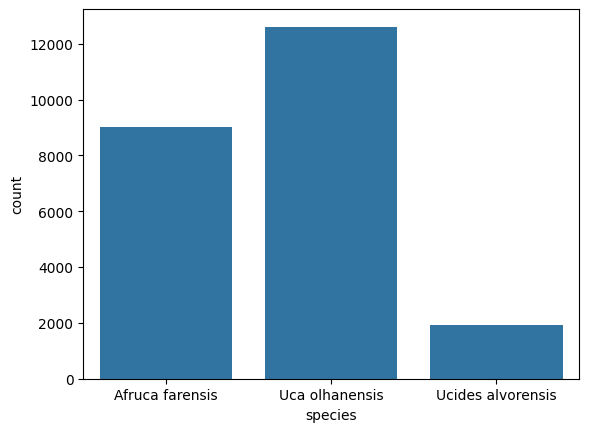

In [38]:
sns.barplot(crabs2['species'].value_counts())
plt.show()

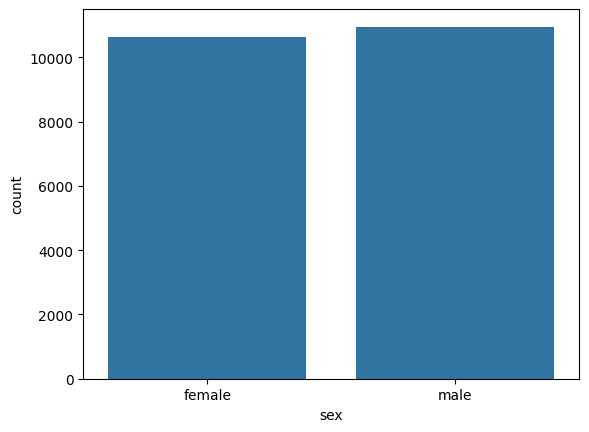

In [42]:
#@title `dropna` does not change the behaviour, because we defined `sex` as category with two valid values
sns.barplot(crabs2['sex'].value_counts())#dropna=False))
plt.show()

**Careful**: we set two categories in the previous NB, therefore the NaNs are not appearing on the plot

In [44]:
crabs2['sex'] = crabs2['sex'].cat.add_categories('missing').fillna('missing')
sns.countplot(data=crabs2, x='sex')
plt.show()

ValueError: new categories must not include old categories: {'missing'}

In [45]:
crabs2['sex'].unique()

['female', 'missing', 'male']
Categories (3, object): ['female', 'male', 'missing']

In [46]:
crabs2['sex'].describe()

,sex
count,23566
unique,3
top,male
freq,10951


#### Exercise:
Can you visually show the crab abundance by species and sex in the same plot?

**R code**

```
nr_crabs_by_sp_sex <- count(crabs2, species, sex)
ggplot(data = nr_crabs_by_sp_sex, mapping = aes(x = species, y = n, fill = sex)) + geom_col()
```

/tmp/ipython-input-47-2839343411.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nr_crabs_by_sp_sex = crabs3.groupby(['species', 'sex']).size().reset_index(name='n')


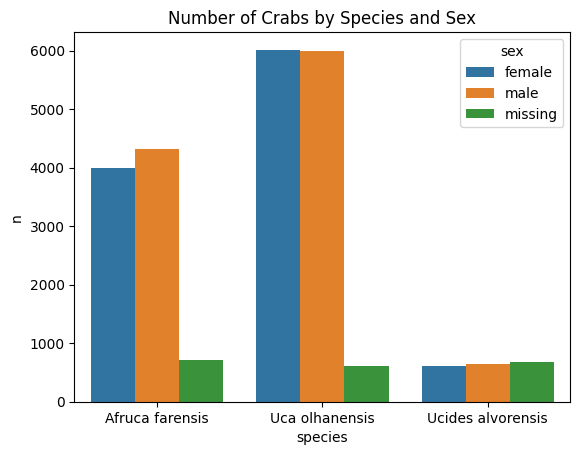

In [47]:
# Count the number of crabs by species and sex
# sns.set_style()
crabs3 = crabs2.copy()
# crabs3['sex'].fillna('Missing', inplace=True)
nr_crabs_by_sp_sex = crabs3.groupby(['species', 'sex']).size().reset_index(name='n')

# Plotting
sns.barplot(data=nr_crabs_by_sp_sex, x='species', y='n', hue='sex')
plt.title('Number of Crabs by Species and Sex')
plt.show()

### Alternative using `catplot`

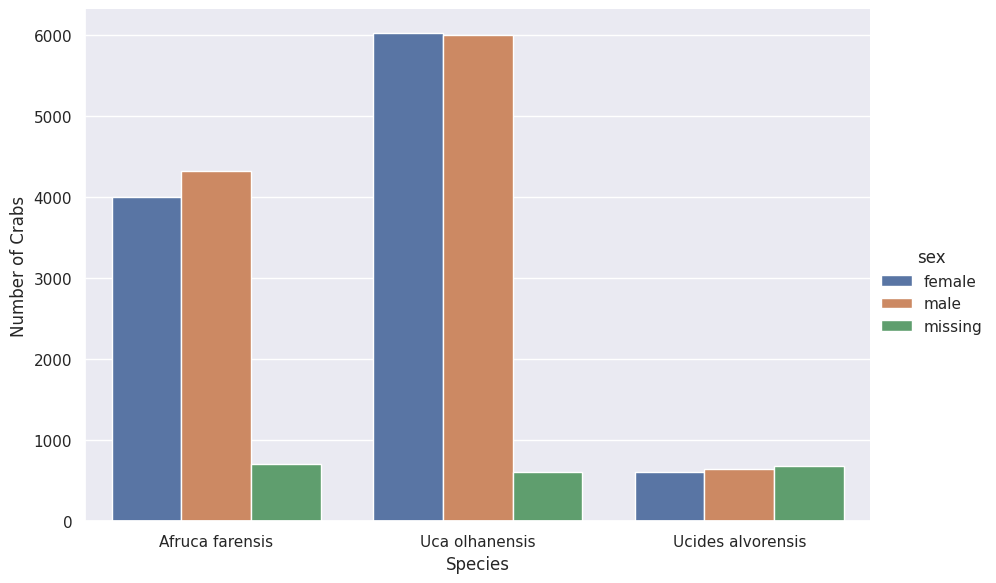

In [48]:
# Plotting with dodge equivalent
sns.set(style="darkgrid")
g = sns.catplot(
    data=nr_crabs_by_sp_sex,
    kind="bar",
    x="species",
    y="n",
    hue="sex",
    dodge=True,
    height=6,
    aspect=1.5
)
g.set_axis_labels("Species", "Number of Crabs")
g.set_titles("Number of Crabs by Species and Sex")
plt.show()

### Subplots
- split to `plt.subplots`
- or here using single command with catplot

**R code**
```
count(crabs, species, stage) %>%
  ggplot(mapping = aes(x = stage, y = n)) +
  geom_col(position = "dodge2") +
  facet_wrap(vars(species))
```

/tmp/ipython-input-49-562946568.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nr_crabs_by_sp_sex_stage = crabs3.groupby(['species', 'sex', 'stage']).size().reset_index(name='n')


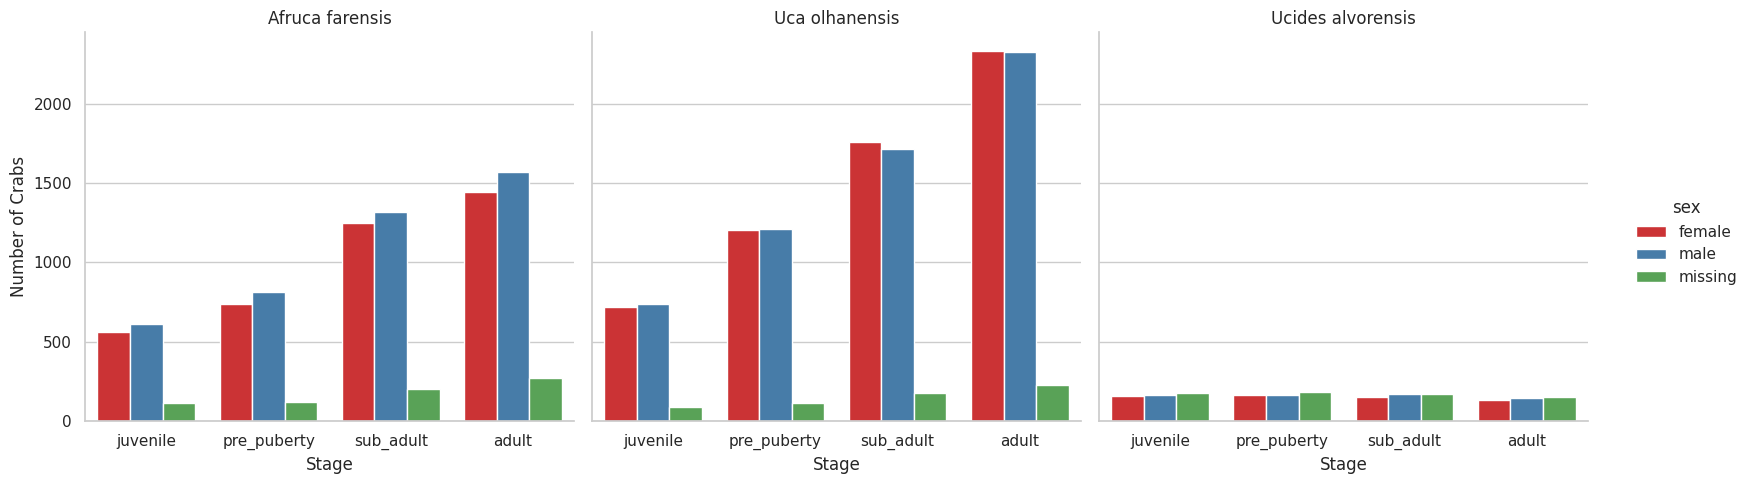

In [49]:
nr_crabs_by_sp_sex_stage = crabs3.groupby(['species', 'sex', 'stage']).size().reset_index(name='n')

# Plotting with dodge equivalent
sns.set(style="whitegrid")
g = sns.catplot(
    data=nr_crabs_by_sp_sex_stage,
    kind="bar",
    x="stage",
    y="n",
    hue="sex",
    palette="Set1",
    col="species",
    col_wrap=3,
    dodge=True,
    height=5,
    aspect=1.
)
g.set_axis_labels("Stage", "Number of Crabs")
g.set_titles(col_template="{col_name}")
sns.move_legend(g, loc='center left', bbox_to_anchor=(1.01, 0.5))
plt.tight_layout()
plt.show()

#### The same but with sex

**R code**
```
ggplot(data = count(crabs3, species, sex, stage), mapping = aes(x = sex, y = n, fill = stage)) +
  geom_col(position = position_dodge2(preserve = "single")) +
  facet_wrap(vars(species))
```

/tmp/ipython-input-50-232620599.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nr_crabs_by_sp_sex_stage = crabs3.groupby(['species', 'sex', 'stage']).size().reset_index(name='n')


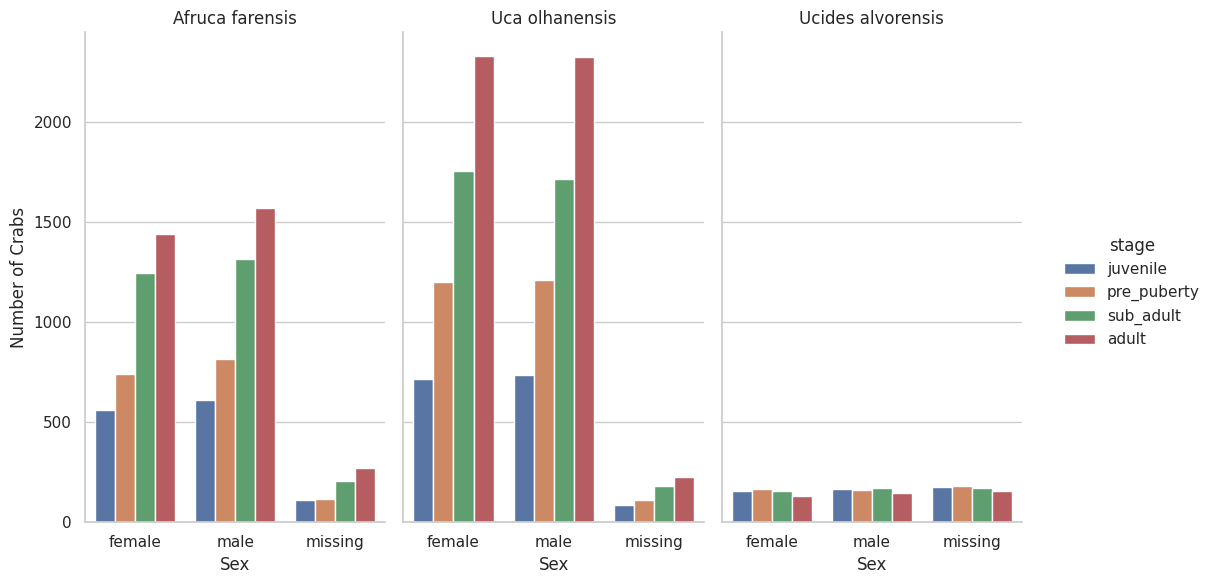

In [50]:
# Count the number of crabs by species, sex, and stage
nr_crabs_by_sp_sex_stage = crabs3.groupby(['species', 'sex', 'stage']).size().reset_index(name='n')

# Plotting with dodge2-like positioning and facet_wrap
sns.set(style="whitegrid")
g = sns.catplot(
    data=nr_crabs_by_sp_sex_stage,
    kind="bar",
    x="sex",
    y="n",
    hue="stage",
    col="species",
    col_wrap=3,
    dodge=True,
    height=6,
    aspect=0.5
)
g.set_axis_labels("Sex", "Number of Crabs")
g.set_titles(col_template="{col_name}")
sns.move_legend(g, loc='center left', bbox_to_anchor=(1.01, 0.5))
plt.tight_layout()
plt.show()

#### Exercise: Convert to percents

/tmp/ipython-input-51-656743684.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nr_crabs_by_sp_sex_stage = crabs3.groupby(['species', 'sex', 'stage']).size().reset_index(name='n')
/tmp/ipython-input-51-656743684.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nr_crabs_by_sp_sex_stage.groupby(['species'])['n']


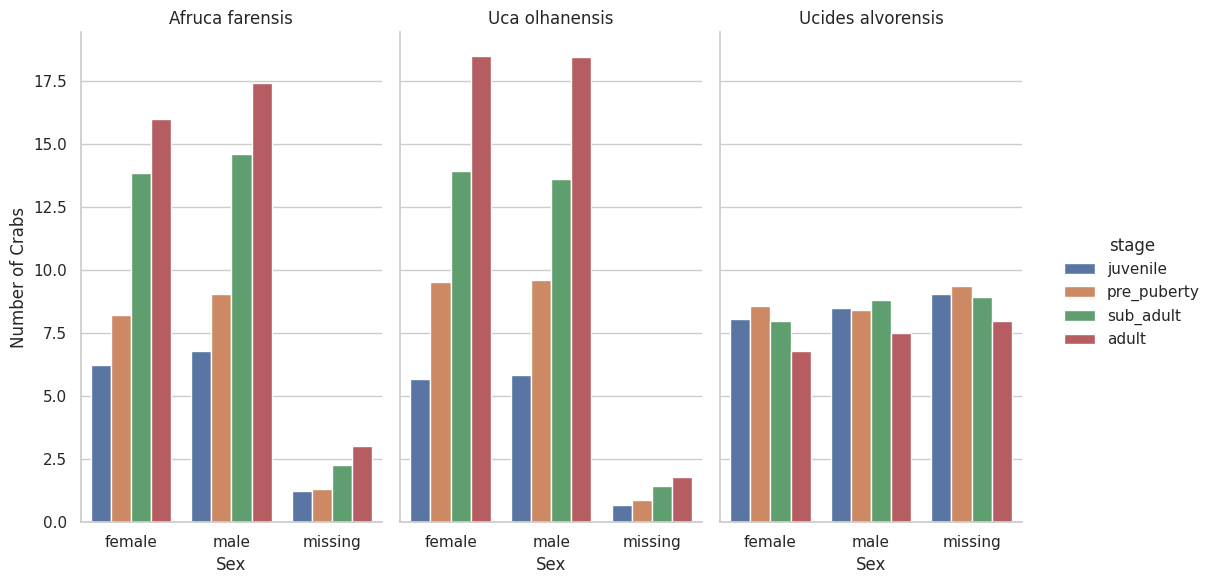

In [51]:
#@title Solution
# Count the number of crabs by species, sex, and stage
nr_crabs_by_sp_sex_stage = crabs3.groupby(['species', 'sex', 'stage']).size().reset_index(name='n')

nr_crabs_by_sp_sex_stage['pct'] = (
    nr_crabs_by_sp_sex_stage.groupby(['species'])['n']
    .transform(lambda x: 100 * x / x.sum())
)

# Plotting with dodge2-like positioning and facet_wrap
sns.set(style="whitegrid")
g = sns.catplot(
    data=nr_crabs_by_sp_sex_stage,
    kind="bar",
    x="sex",
    y="pct",
    hue="stage",
    col="species",
    col_wrap=3,
    dodge=True,
    height=6,
    aspect=0.5
)
g.set_axis_labels("Sex", "Number of Crabs")
g.set_titles(col_template="{col_name}")
sns.move_legend(g, loc='center left', bbox_to_anchor=(1.01, 0.5))
plt.tight_layout()
plt.show()

## More plot types

### violin

**R code**
```
crabs3 %>%
  drop_na(sex) %>%
  ggplot(mapping = aes(x = stage, y = carapace_width, fill = sex)) +
  geom_violin()
```

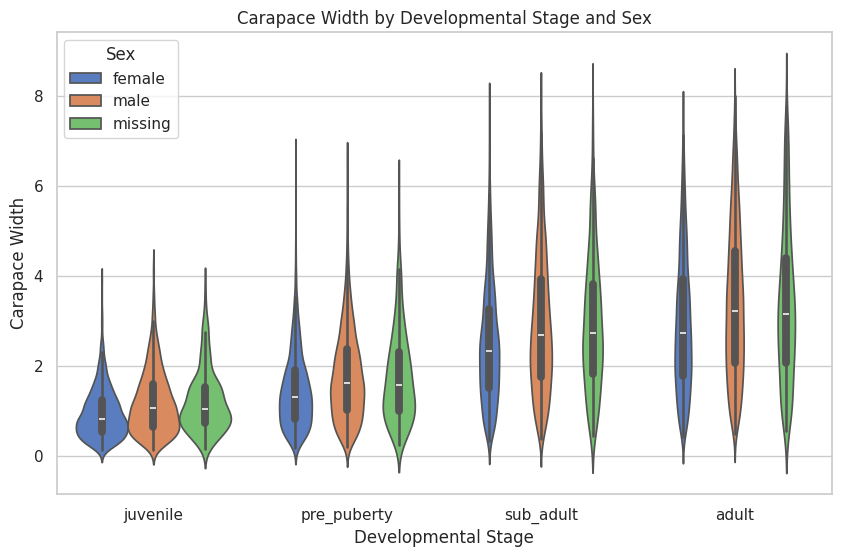

In [52]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(data=crabs3, x='stage', y='carapace_width', hue='sex',
               # split=True,
               palette='muted')

# Customize the plot
plt.xlabel('Developmental Stage')
plt.ylabel('Carapace Width')
plt.title('Carapace Width by Developmental Stage and Sex')
plt.legend(title='Sex')
plt.show()

### Density
**R code**

```
crabs3 %>%
  ggplot(mapping = aes(x = carapace_width, fill = sex)) +
  geom_density(alpha=0.8)
```

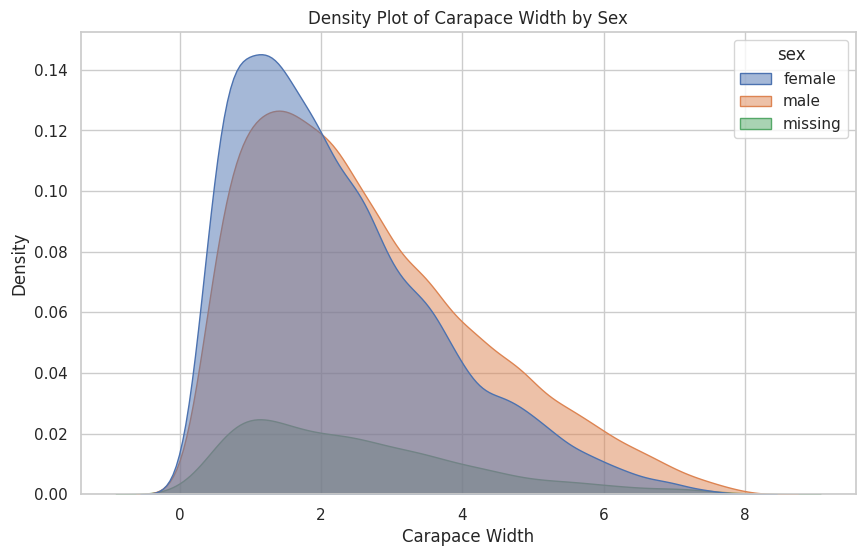

In [54]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=crabs3, x='carapace_width', hue='sex', fill=True, alpha=0.5)

# Customize the plot
plt.xlabel('Carapace Width')
plt.ylabel('Density')
plt.title('Density Plot of Carapace Width by Sex')
plt.show()

### Histogram

**R code**

```
crabs3 %>%
  ggplot(mapping = aes(x = carapace_width, fill = sex, col = sex)) +
  geom_histogram(alpha=0.8, position = 'identity')
```

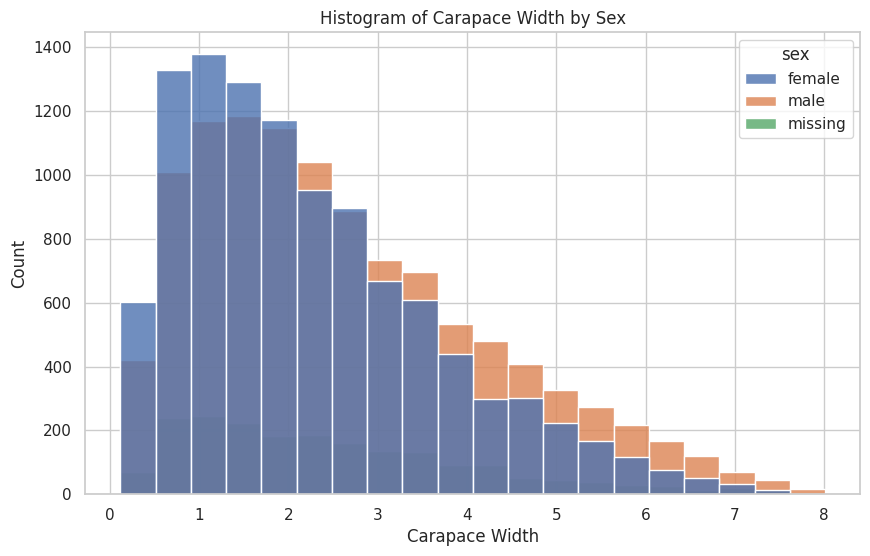

In [55]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=crabs3, x='carapace_width', hue='sex', fill=True, alpha=0.8, bins=20)

# Customize the plot
plt.xlabel('Carapace Width')
plt.ylabel('Count')
plt.title('Histogram of Carapace Width by Sex')
plt.show()

### Boxplot

**R code**

```
crabs3 %>%
  ggplot(mapping = aes(y = carapace_width, fill = sex)) +
  geom_boxplot()
```

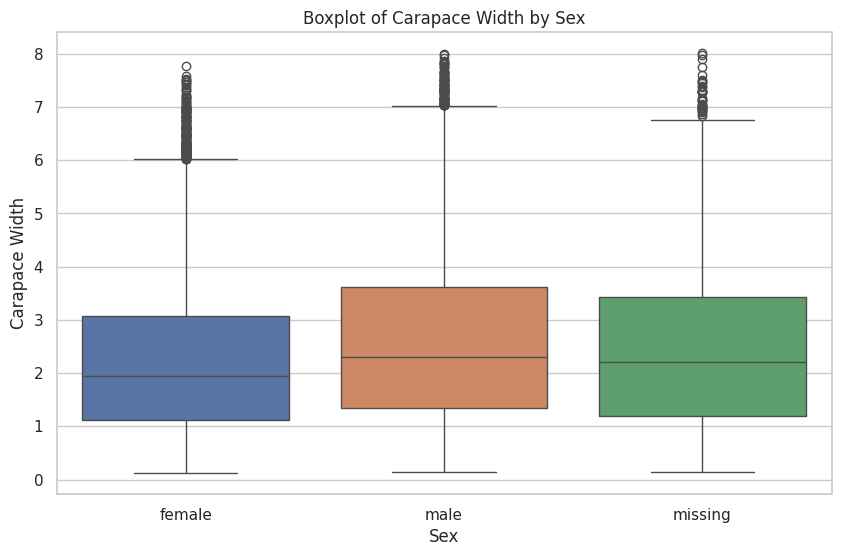

In [56]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=crabs3, y='carapace_width', x='sex', hue='sex', fill=True)

# Customize the plot
plt.ylabel('Carapace Width')
plt.xlabel('Sex')
plt.title('Boxplot of Carapace Width by Sex')
plt.show()

### Scatter plot

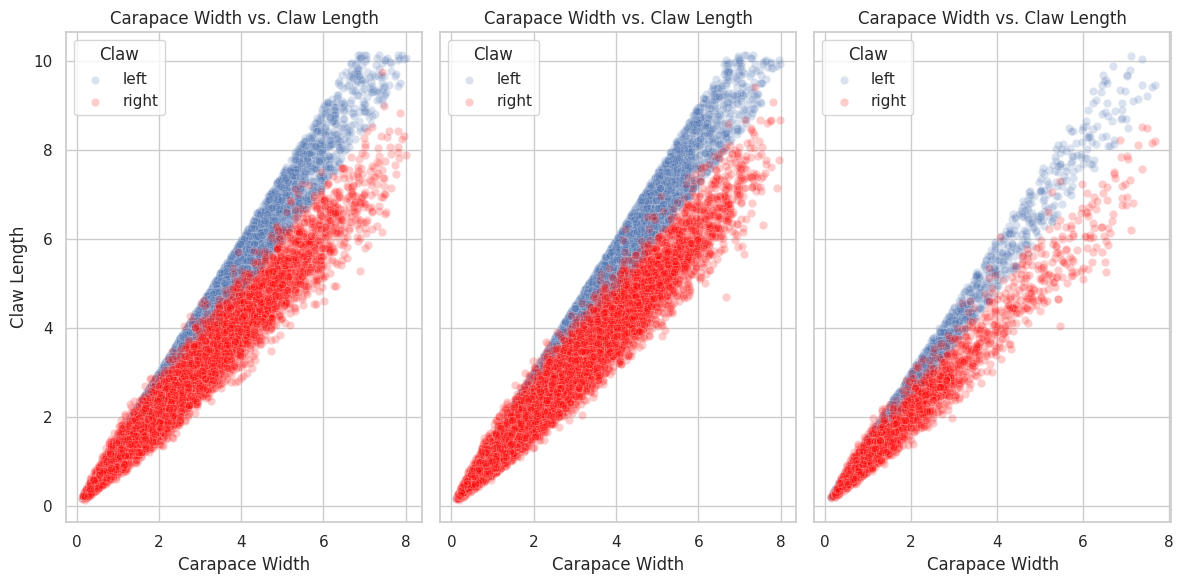

In [60]:
# Create three separate plots using matplotlib and seaborn
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

# Plot 1: carapace_width vs. left_claw_length
sns.scatterplot(data=crabs3[crabs3['species']=='Afruca farensis'],
                x='carapace_width', y='left_claw_length',
                alpha=0.2, ax=axes[0], label='left')
sns.scatterplot(data=crabs3[crabs3['species']=='Afruca farensis'],
                x='carapace_width', y='right_claw_length',
                alpha=0.2, ax=axes[0], color='red', label='right')

axes[0].set_title('Carapace Width vs. Claw Length')
axes[0].set_xlabel('Carapace Width')
axes[0].set_ylabel('Claw Length')
axes[0].legend(title='Claw')

# Plot 2: carapace_width vs. right_claw_length
sns.scatterplot(data=crabs3[crabs3['species']=='Uca olhanensis'],
                x='carapace_width', y='left_claw_length',
                alpha=0.2, ax=axes[1], label='left')
sns.scatterplot(data=crabs3[crabs3['species']=='Uca olhanensis'],
                x='carapace_width', y='right_claw_length',
                alpha=0.2, ax=axes[1], color='red', label='right')
axes[1].set_title('Carapace Width vs. Claw Length')
axes[1].set_xlabel('Carapace Width')
axes[1].set_ylabel('Claw Length')
axes[1].legend(title='Claw')

# Plot 2: carapace_width vs. right_claw_length
sns.scatterplot(data=crabs3[crabs3['species']=='Ucides alvorensis'],
                x='carapace_width', y='left_claw_length',
                alpha=0.2, ax=axes[2], label='left')
sns.scatterplot(data=crabs3[crabs3['species']=='Ucides alvorensis'],
                x='carapace_width', y='right_claw_length',
                alpha=0.2, ax=axes[2], color='red', label='right')
axes[2].set_title('Carapace Width vs. Claw Length')
axes[2].set_xlabel('Carapace Width')
axes[2].set_ylabel('Claw Length')
axes[2].legend(title='Claw')

# Adjust layout
plt.tight_layout()
plt.show()

## Time series

In [61]:
species_by_time = crabs3.groupby(['date', 'species']).size().unstack()
species_by_time.head()

/tmp/ipython-input-61-3043464357.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  species_by_time = crabs3.groupby(['date', 'species']).size().unstack()


species,Afruca farensis,Uca olhanensis,Ucides alvorensis
date,,,
2020-01-02,254,348,49
2020-02-23,258,375,50
2020-03-16,278,350,60
2020-04-12,241,350,60
2020-05-21,250,360,52


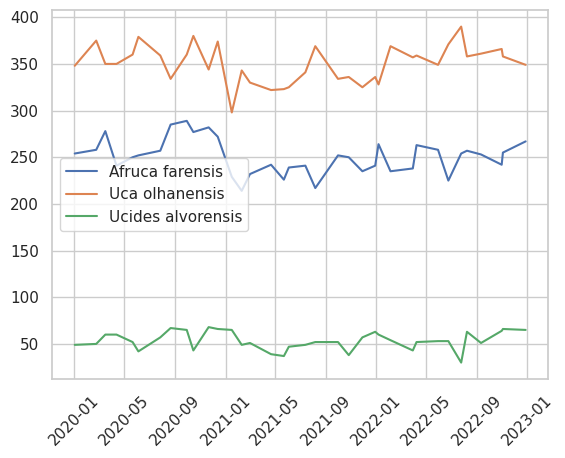

In [63]:
plt.plot(species_by_time.index, species_by_time['Afruca farensis'])
plt.plot(species_by_time.index, species_by_time['Uca olhanensis'])
plt.plot(species_by_time.index, species_by_time['Ucides alvorensis'])
plt.xticks(rotation=45)
plt.legend(['Afruca farensis', 'Uca olhanensis', 'Ucides alvorensis'])
plt.show()

In [64]:
species_by_time = crabs3.groupby(['date', 'region', 'species']).size().unstack()
species_by_time.head()

/tmp/ipython-input-64-1582116541.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  species_by_time = crabs3.groupby(['date', 'region', 'species']).size().unstack()


species                 Afruca farensis  Uca olhanensis  Ucides alvorensis
date       region                                                         
2020-01-02 Ria Alvor                132             142                 21
           Ria Formosa              122             206                 28
2020-02-23 Ria Alvor                127             161                 24
           Ria Formosa              131             214                 26
2020-03-16 Ria Alvor                137             148                 29

In [65]:
time_evolution = species_by_time.unstack()

In [66]:
time_evolution.head()

species    Afruca farensis             Uca olhanensis              \
region           Ria Alvor Ria Formosa      Ria Alvor Ria Formosa   
date                                                                
2020-01-02             132         122            142         206   
2020-02-23             127         131            161         214   
2020-03-16             137         141            148         202   
2020-04-12             110         131            151         199   
2020-05-21             114         136            133         227   

species    Ucides alvorensis              
region             Ria Alvor Ria Formosa  
date                                      
2020-01-02                21          28  
2020-02-23                24          26  
2020-03-16                29          31  
2020-04-12                26          34  
2020-05-21                24          28

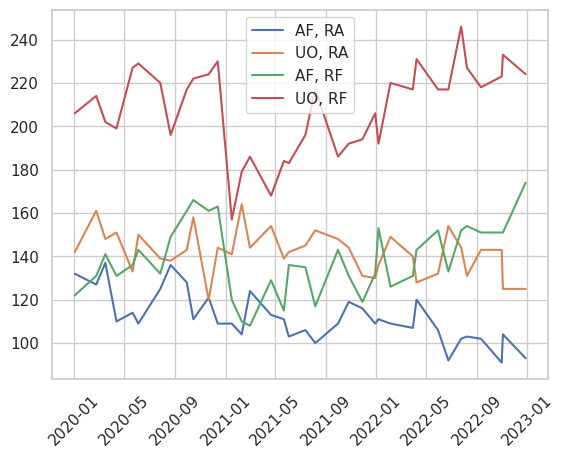

In [67]:
plt.plot(time_evolution.index, time_evolution['Afruca farensis']['Ria Alvor'], label='AF, RA')
plt.plot(time_evolution.index, time_evolution['Uca olhanensis']['Ria Alvor'], label='UO, RA')

plt.plot(time_evolution.index, time_evolution['Afruca farensis']['Ria Formosa'], label='AF, RF')
plt.plot(time_evolution.index, time_evolution['Uca olhanensis']['Ria Formosa'], label='UO, RF')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [74]:
agg = time_evolution.groupby(level=1, axis=1).sum()
agg.head()

/tmp/ipython-input-74-852855504.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  agg = time_evolution.groupby(level=1, axis=1).sum()
/tmp/ipython-input-74-852855504.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = time_evolution.groupby(level=1, axis=1).sum()


region,Ria Alvor,Ria Formosa
date,,
2020-01-02,295,356
2020-02-23,312,371
2020-03-16,314,374
2020-04-12,287,364
2020-05-21,271,391


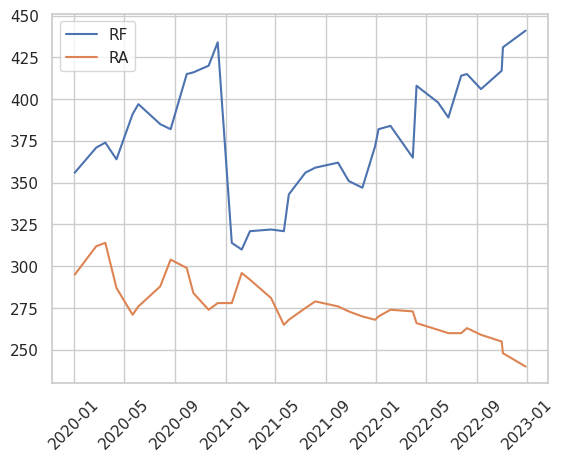

In [75]:
plt.plot(time_evolution.index, agg['Ria Formosa'], label='RF')
plt.plot(time_evolution.index, agg['Ria Alvor'], label='RA')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In total we see trend, which is too noise in the previous plots.
- Lesson, plot from highest aggregation levels to more granular.
-`RF` shows one of event, `RA` shows sort of downward trend and oscillations